In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

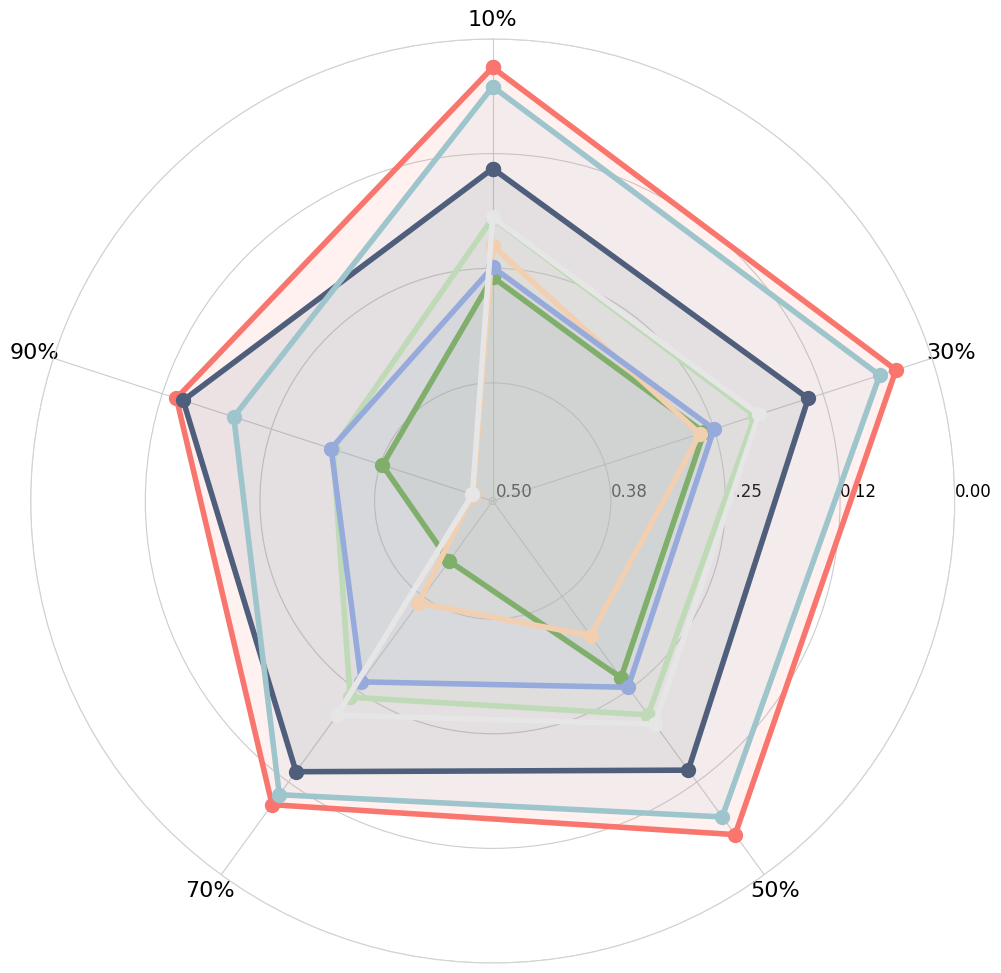

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

methods = ["Our", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0310, 0.0414, 0.0541, 0.0945, 0.1412],
                  [0.2597, 0.2615, 0.2657, 0.4229, 0.3774],
                  [0.1413, 0.1420, 0.1410, 0.1389, 0.1489],
                  [0.2253, 0.2662, 0.3223, 0.3661, 0.4813],
                  [0.1953, 0.2032, 0.2155, 0.2393, 0.3207],
                  [0.0520, 0.0601, 0.0780, 0.1079, 0.2069],
                  [0.2488, 0.2501, 0.2527, 0.2600, 0.3186],
                  [0.1943, 0.1985, 0.2030, 0.2151, 0.4806]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]
    # color_palette = sns.color_palette()[:8]
    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig
  

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 1]
 [8 7 7 8 6]
 [3 3 3 3 2]
 [6 8 8 7 8]
 [5 5 5 5 5]
 [2 2 2 2 3]
 [7 6 6 6 4]
 [4 4 4 4 7]]


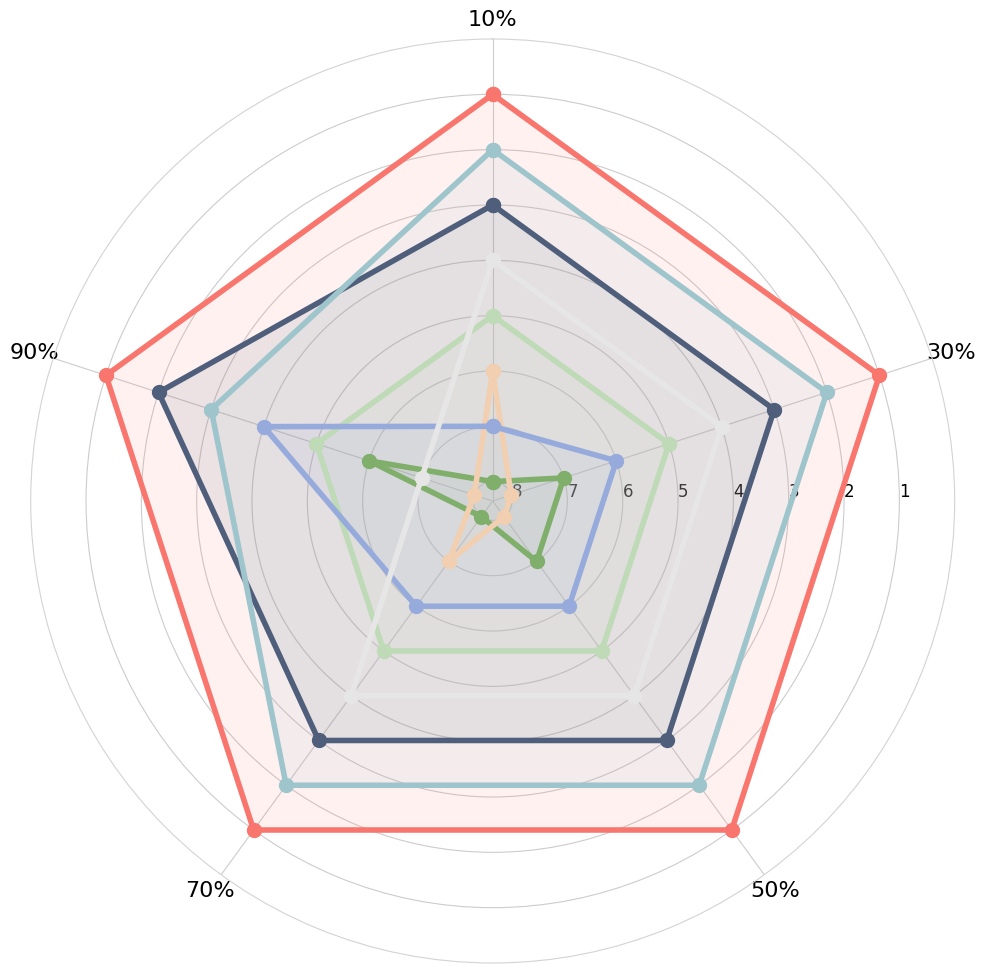

In [4]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

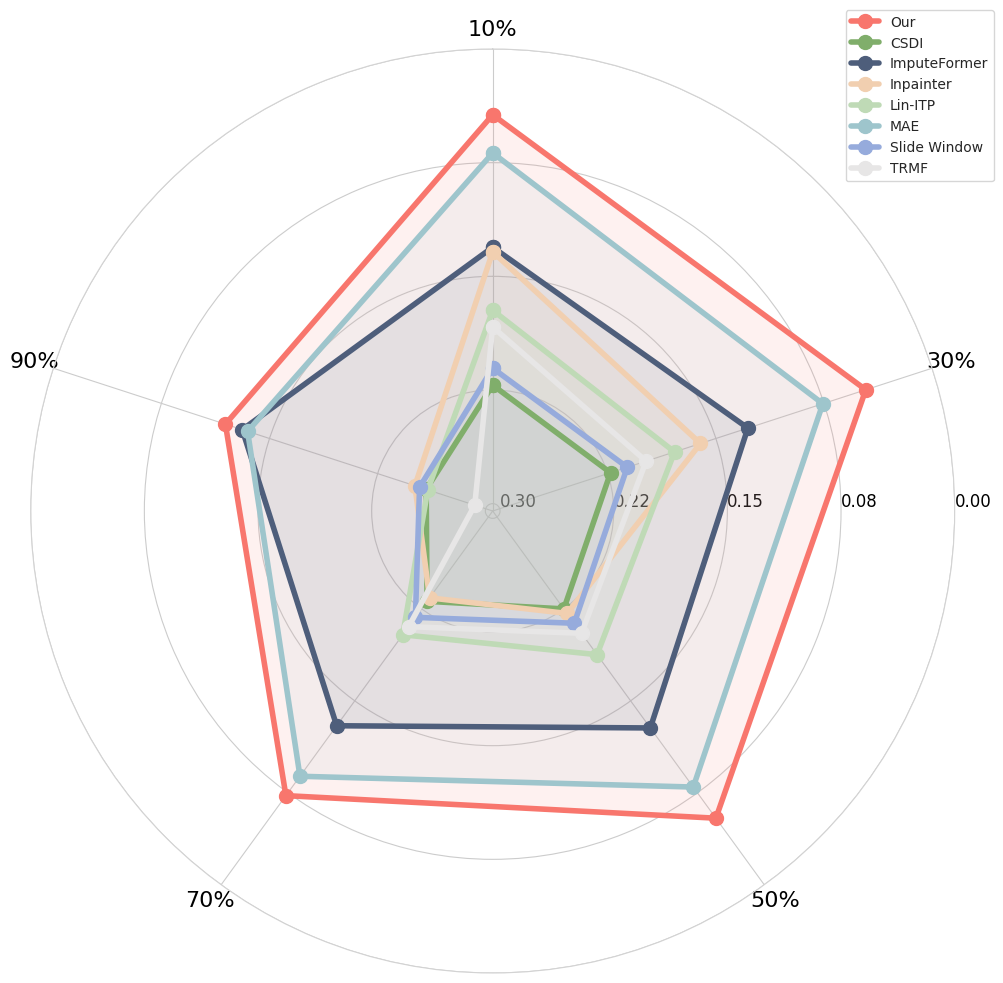

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0434, 0.0460, 0.0543, 0.0727, 0.1194],
                  [0.2218, 0.2231, 0.2250, 0.2312, 0.2587],
                  [0.1308, 0.1278, 0.1279, 0.1297, 0.1311],
                  [0.1338, 0.1607, 0.2213, 0.2340, 0.2509],
                  [0.1724, 0.1787, 0.1877, 0.2039, 0.2598],
                  [0.0686, 0.0758, 0.0797, 0.0885, 0.1348],
                  [0.2106, 0.2115, 0.2133, 0.2181, 0.2541],
                  [0.1834, 0.1984, 0.2051, 0.2105, 0.2924]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 1]
 [8 8 8 7 6]
 [3 3 3 3 2]
 [4 4 7 8 4]
 [5 5 4 4 7]
 [2 2 2 2 3]
 [7 7 6 6 5]
 [6 6 5 5 8]]


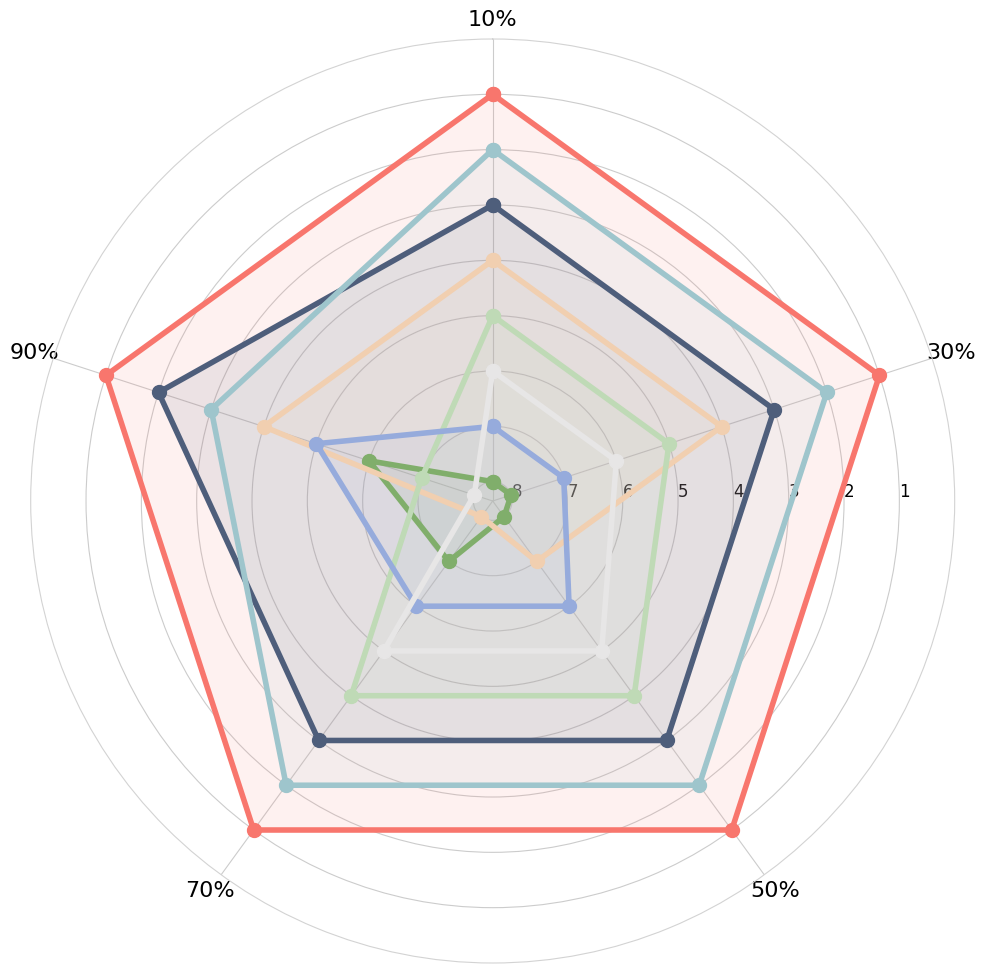

In [6]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

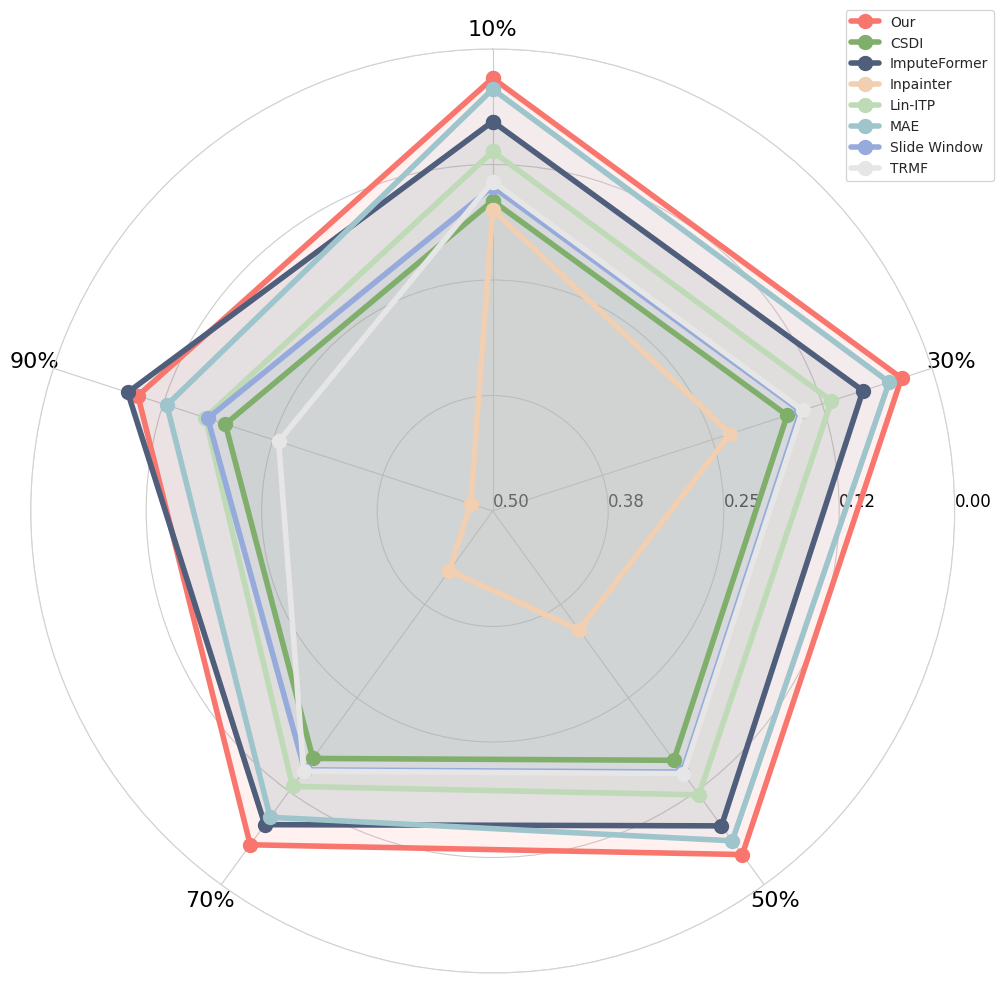

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0316, 0.0348, 0.0404, 0.0535, 0.0963],
                  [0.1643, 0.1649, 0.1665, 0.1690, 0.1958],
                #   [0.0311, 0.0343, 0.0397, 0.0626, 0.1319],
                  [0.0785, 0.0787, 0.0788, 0.0804, 0.0847],
                  [0.1740, 0.2297, 0.3410, 0.4201, 0.4749],
                  [0.1109, 0.1145, 0.1203, 0.1316, 0.1730],
                  [0.0435, 0.0489, 0.0588, 0.0903, 0.1292],
                  [0.1490, 0.1497, 0.1508, 0.1537, 0.1757],
                  [0.1434, 0.1473, 0.1487, 0.1519, 0.2564]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.5, 0, 5), np.linspace(0.5, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 2]
 [7 7 7 7 6]
 [3 3 3 2 1]
 [8 8 8 8 8]
 [4 4 4 4 4]
 [2 2 2 3 3]
 [6 6 6 6 5]
 [5 5 5 5 7]]


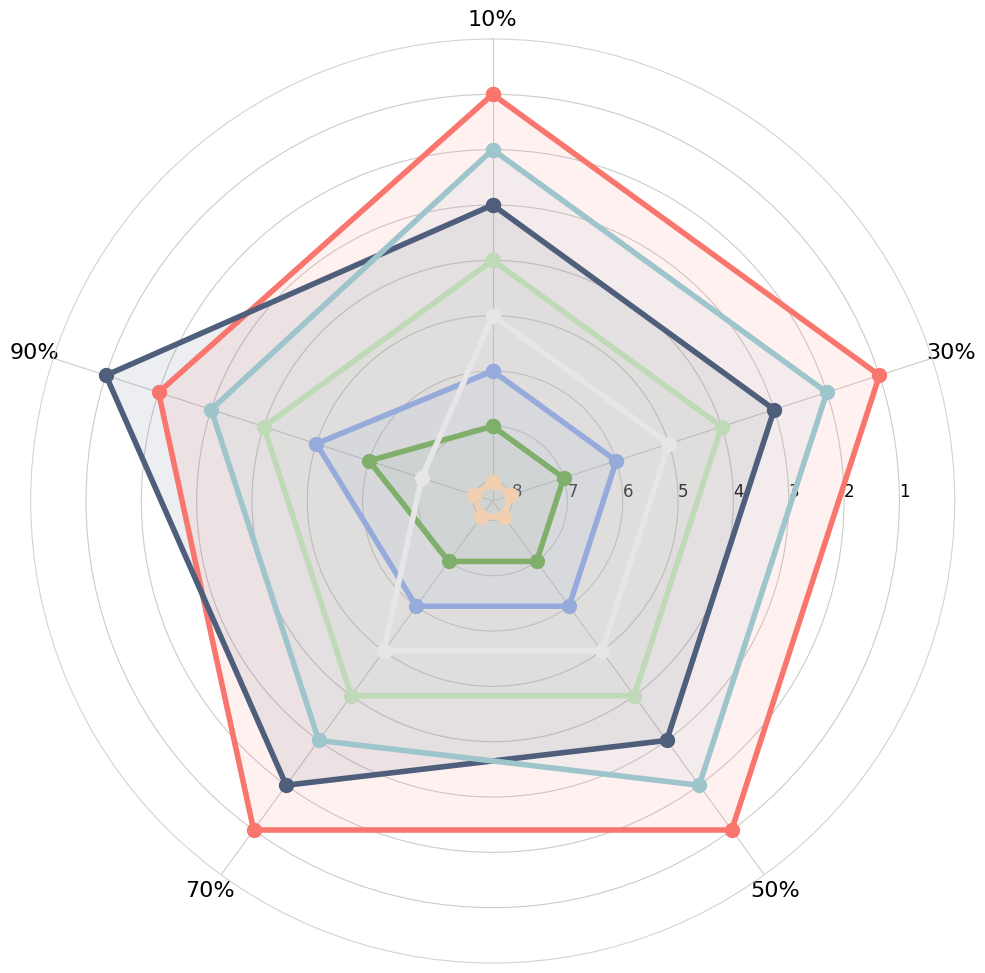

In [8]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()

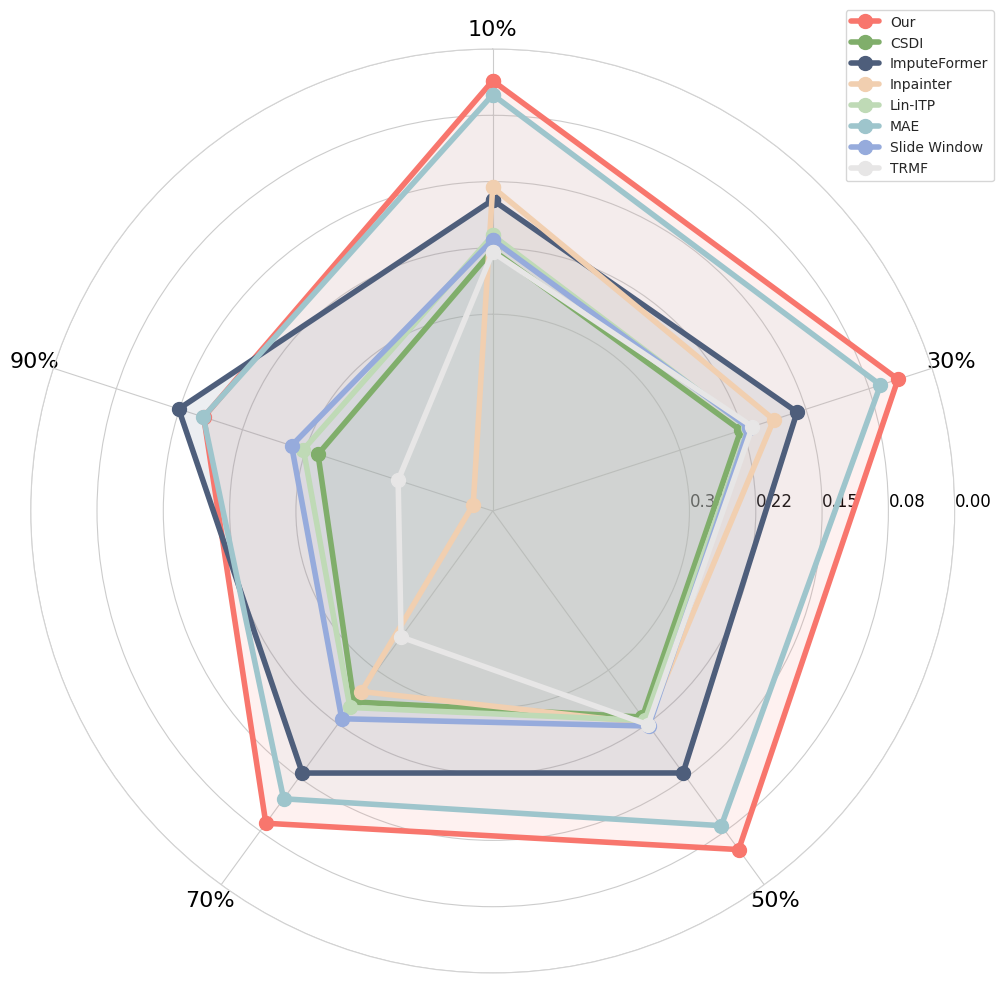

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib.ticker as mtick

methods = ["Our", "CSDI", "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "30%", "50%", "70%", "90%"]
value = np.array([
                  [0.0359, 0.0406, 0.0492, 0.0860, 0.1789],
                  [0.2274, 0.2276, 0.2345, 0.2556, 0.3148],
                #   [0.0346, 0.0367, 0.0420, 0.0939, 0.2144],
                  [0.1708, 0.1606, 0.1563, 0.1562, 0.1491],
                  [0.1564, 0.1883, 0.2258, 0.2701, 0.4994],
                  [0.2108, 0.2187, 0.2297, 0.2479, 0.2975],
                  [0.0517, 0.0614, 0.0826, 0.1202, 0.1784],
                  [0.2159, 0.2180, 0.2219, 0.2321, 0.2834],
                  [0.2299, 0.2137, 0.2237, 0.3463, 0.4101]])


# Function
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(0.3, 0, 5), np.linspace(0.3, 0, 5).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
fig = plot_radar_chart(value, methods, title="", metrics=metrics)
plt.show()

[[1 1 1 1 3]
 [7 8 8 6 6]
 [4 3 3 3 1]
 [3 4 6 7 8]
 [5 7 7 5 5]
 [2 2 2 2 2]
 [6 6 4 4 4]
 [8 5 5 8 7]]


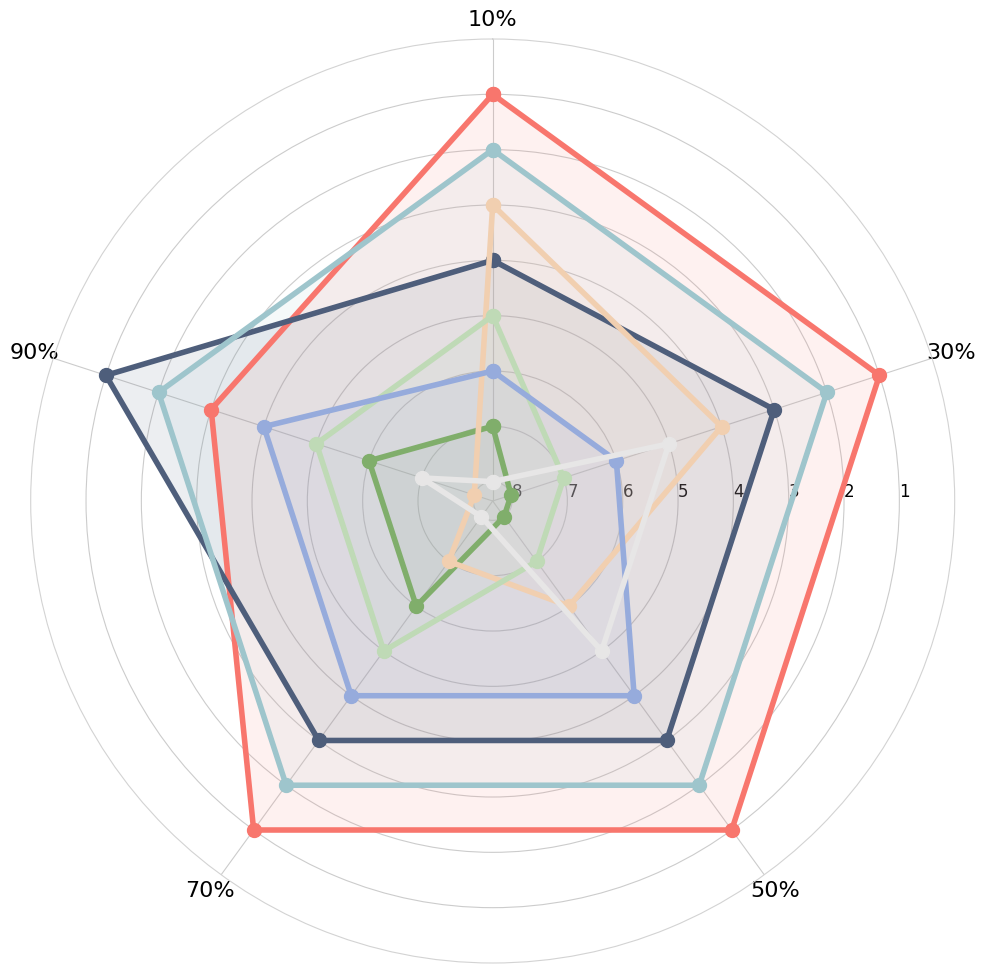

In [10]:
from matplotlib.ticker import MaxNLocator
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=1.15, fontsize=20)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    color_palette = ["#F8766D", "#80AE6B", "#4E5E7B",  "#F1CFB0", "#BFDAB6", "#9EC5CC", "#96ABDC","#E7E6E6"]

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.10, color=color_palette[i % len(color_palette)])
        
    
    plt.yticks(np.linspace(8, 1, 8), np.linspace(8, 1, 8).tolist(), color="black", size=12)
    plt.xticks(theta[:-1], metrics, color="black", size=16)
    ax.yaxis.set_inverted(True)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1)) 
    # plt.legend(loc="upper right", bbox_to_anchor=(1.05,1.05))
    
    return fig

# Plot 
rankings = np.argsort(np.argsort(value, 0),0)+1
print(rankings)
fig = plot_radar_chart(rankings, methods, title="", metrics=metrics)
plt.show()